# RTDDI

In [2]:
import os
import pandas as pd

# -----------------------
# Configuration & Settings
# -----------------------

# Directory where your CSV files are stored.
base_dir = '/Users/stupong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Natchapon PhD/Upgrading/PhD/NKDE/rtddi_spare'

# List to store data from each CSV.
dataframes = []

# -----------------------
# Data Reading & Combining
# -----------------------

# Loop over Gregorian years (2011 to 2024)
for year in range(2011, 2025):
    # Build the file path with the naming pattern: e.g., '2011.csv'
    file_path = os.path.join(base_dir, f'{year}.csv')
    
    try:
        # Read the CSV file, handling potential encoding issues.
        df = pd.read_csv(file_path, encoding='utf-8', encoding_errors='ignore', low_memory=False)
        
        # Add a column indicating the Year.
        df['Year'] = year
        
        # Standardize the district name column:
        # In 2024, rename "acc_district_name" to "Acc Dist" to match the other years.
        if year == 2024 and 'acc_district_name' in df.columns:
            df = df.rename(columns={'acc_district_name': 'Acc Dist'})
        
        # Append the DataFrame to the list.
        dataframes.append(df)
        
        print(f"Read file: {file_path} with shape {df.shape}")
    except Exception as e:
        print(f"Error reading file for year {year} at {file_path}: {e}")

# Combine all DataFrames into one.
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True, sort=False)
    print(f"Combined DataFrame shape: {combined_df.shape}")
else:
    print("No files were read successfully.")

# Optionally, inspect the combined DataFrame.
print(combined_df.head())
print(combined_df.info())


Read file: /Users/stupong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Natchapon PhD/Upgrading/PhD/NKDE/rtddi_spare/2011.csv with shape (21996, 22)
Read file: /Users/stupong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Natchapon PhD/Upgrading/PhD/NKDE/rtddi_spare/2012.csv with shape (21603, 22)
Read file: /Users/stupong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Natchapon PhD/Upgrading/PhD/NKDE/rtddi_spare/2013.csv with shape (21221, 22)
Read file: /Users/stupong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Natchapon PhD/Upgrading/PhD/NKDE/rtddi_spare/2014.csv with shape (20790, 22)
Read file: /Users/stupong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Natchapon PhD/Upgrading/PhD/NKDE/rtddi_spare/2015.csv with shape (19960, 22)
Read file: /Users/stupong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Natchapon PhD/Upgrading/PhD/NKDE/rtddi_spare/2016.csv with shape (21745, 22)
Read file: /Users/stupong/Library/CloudStorage/OneDrive-Un

In [5]:
# Calculate the percentage of 'รถจักรยานยนต์' for each year
total_by_year = combined_df['Year'].value_counts().sort_index()
moto_by_year = combined_df[combined_df['Vehicle Merge Final'] == 'รถจักรยานยนต์']['Year'].value_counts().sort_index()
percent_by_year = (moto_by_year / total_by_year * 100).fillna(0).round(1)
print(percent_by_year)

Year
2011    26.0
2012    26.8
2013    26.4
2014    26.3
2015    29.4
2016    28.0
2017    56.2
2018    53.9
2019    54.2
2020    52.0
2021    51.5
2022    49.6
2023    54.2
2024    47.4
Name: count, dtype: float64


In [22]:
import os
import pandas as pd

# -----------------------
# Configuration & Settings
# -----------------------

# Directory where your CSV files are stored.
base_dir = '/Users/stupong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Natchapon PhD/Upgrading/PhD/NKDE/rtddi'

# List to store data from each CSV.
dataframes = []

# -----------------------
# Data Reading & Combining
# -----------------------

# Loop over Gregorian years (2011 to 2024)
for year in range(2011, 2025):
    # Build the file path with the naming pattern: e.g., '2011.csv'
    file_path = os.path.join(base_dir, f'{year}.csv')
    
    try:
        # Read the CSV file, handling potential encoding issues.
        df = pd.read_csv(file_path, encoding='utf-8', encoding_errors='ignore', low_memory=False)
        
        # Add a column indicating the Year.
        df['Year'] = year
        
        # Standardize the district name column:
        # In 2024, rename "acc_district_name" to "Acc Dist" to match the other years.
        if year == 2024 and 'acc_district_name' in df.columns:
            df = df.rename(columns={'acc_district_name': 'Acc Dist'})
        
        # Append the DataFrame to the list.
        dataframes.append(df)
        
        print(f"Read file: {file_path} with shape {df.shape}")
    except Exception as e:
        print(f"Error reading file for year {year} at {file_path}: {e}")

# Combine all DataFrames into one.
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True, sort=False)
    print(f"Combined DataFrame shape: {combined_df.shape}")
else:
    print("No files were read successfully.")

# Optionally, inspect the combined DataFrame.
print(combined_df.head())
print(combined_df.info())

# -----------------------
# Data Cleaning: Adjusting the AccProv Column
# -----------------------

# Option 1: Replace with a blank string
# if 'AccProv' in combined_df.columns:
#     combined_df['AccProv'] = combined_df['AccProv'].replace("ไม่ทราบจังหวัด", "")

# Option 2: Replace with NA (pandas.NA)
if 'จ.ที่เสียชีวิต' in combined_df.columns:
    combined_df['จ.ที่เสียชีวิต'] = combined_df['จ.ที่เสียชีวิต'].replace("ไม่ทราบจังหวัด", pd.NA)

# You can now continue to work with the cleaned combined_df
print("After cleaning the จ.ที่เสียชีวิต column:")
print(combined_df['จ.ที่เสียชีวิต'].unique())


In [9]:
combined_df

,Dead Conso Id,Dead Year_ปีที่เสียชีวิต,DEAD_YEAR,Age,Sex,Nationality Id,Tumbol,District,Province,Risk Helmet,...,Date Rec,Time Rec,Acc Sub Dist,Acc Dist,จ.ที่เสียชีวิต,Acc La,Acclong,Ncause,Vehicle Merge Final,Year
0,8600819,2554,2011,38.0,ชาย,99.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,กำแพงเพชร,NaN,NaN,V499,รถยนต์,2011
1,8600823,2554,2011,41.0,ชาย,99.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ลพบุรี,NaN,NaN,V499,รถยนต์,2011
2,8600822,2554,2011,54.0,ชาย,99.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,อุดรธานี,NaN,NaN,V899,NaN,2011
3,8610778,2554,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,นครสวรรค์,NaN,NaN,NaN,NaN,2011
4,8608938,2554,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ชลบุรี,NaN,NaN,NaN,NaN,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275894,11678207,2567,2024,37.0,ชาย,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,บ้านโพธิ์,ฉะเชิงเทรา,NaN,NaN,V892,NaN,2024
275895,11679231,2567,2024,79.0,ชาย,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ธัญบุรี,ปทุมธานี,NaN,NaN,V892,NaN,2024
275896,11679743,2567,2024,33.0,ชาย,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,เมืองพิษณุโลก,พิษณุโลก,NaN,NaN,V892,NaN,2024
275897,11680511,2567,2024,71.0,หญิง,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,แม่ริม,เชียงใหม่,NaN,NaN,V892,NaN,2024


## Missing varaibles

/var/folders/08/36_394xj1plgkpr172kjs8mr0000gn/T/ipykernel_55576/264930273.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  year_missing = combined_df.groupby('Year').apply(lambda group: group.isnull().mean() * 100)


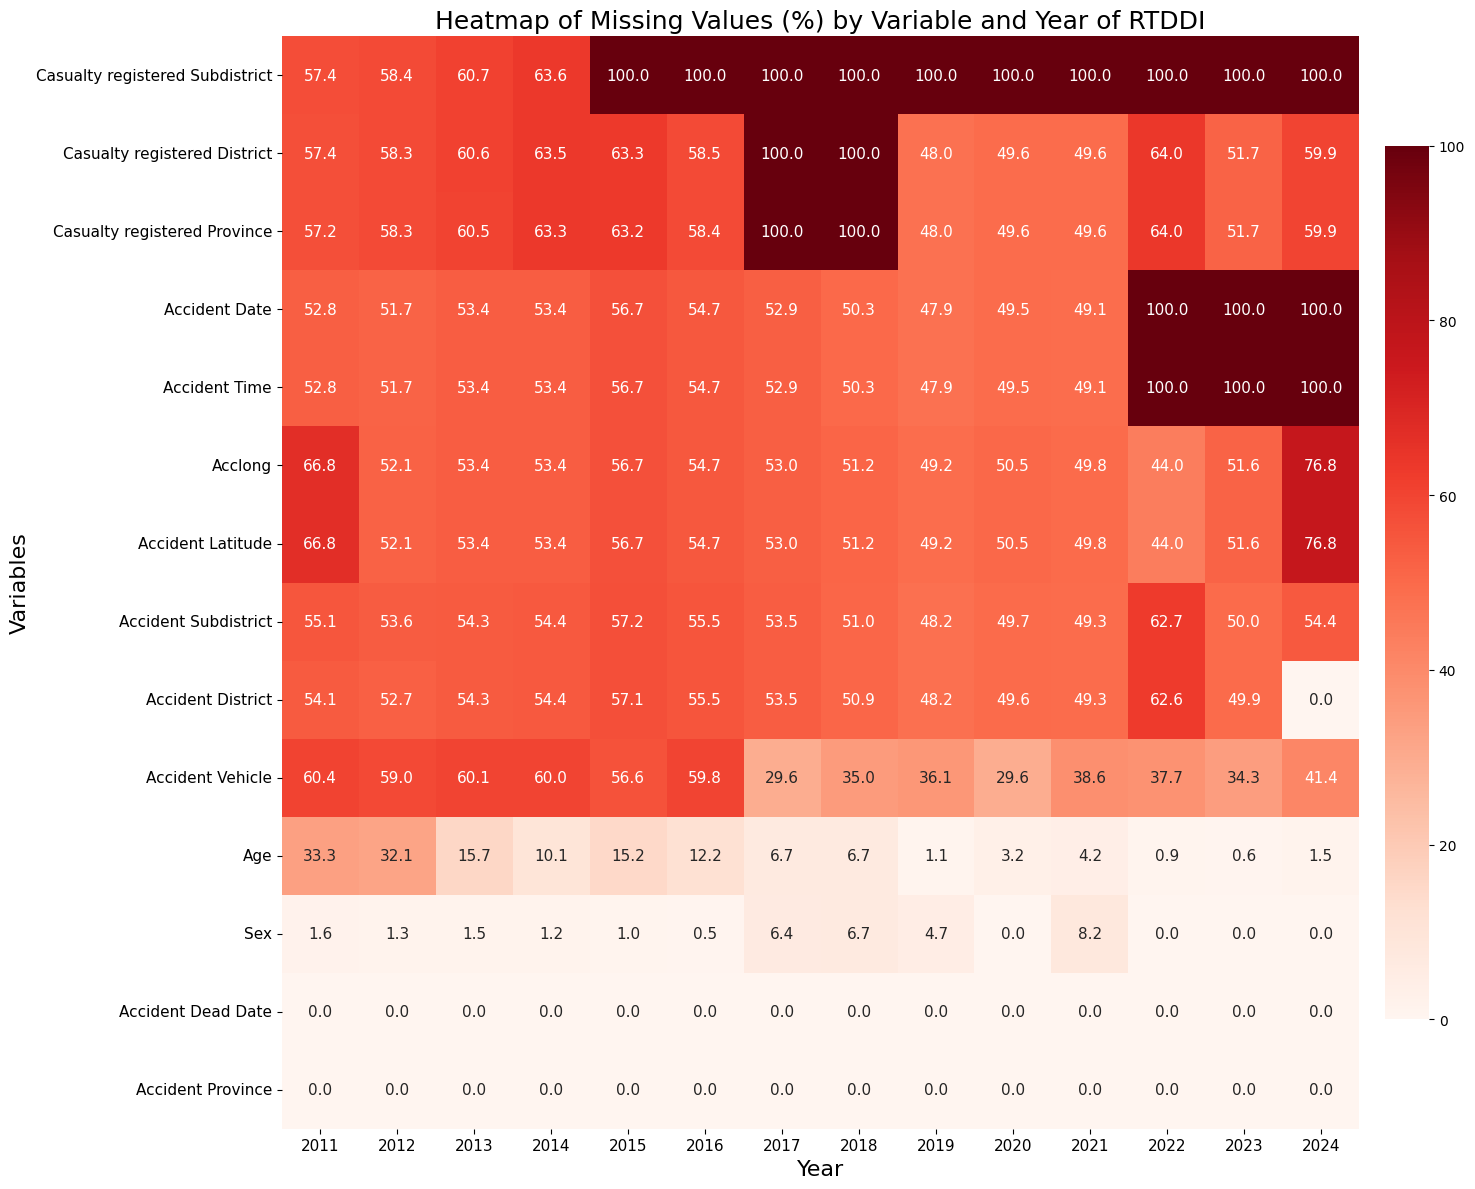

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Compute missing percentages by variable per year ---
# Group combined_df by 'Year', compute fraction of missing values for each column, and convert to percentage.
year_missing = combined_df.groupby('Year').apply(lambda group: group.isnull().mean() * 100)

# Transpose so that rows represent variables and columns represent years.
missing_by_year = year_missing.T

# --- Step 2: Exclude unwanted variables ---
excluded_cols = [
    "Dead Conso Id", 
    "Dead Year_ปีที่เสียชีวิต ", 
    "DEAD_YEAR", 
    "Risk Helmet", 
    "Risk Safety Belt",
    "Ncause",
    "Year",           # Exclude if it appears as a row in missing_by_year
    "Nationality Id",  # Exclude if it appears as a row in missing_by_year
]
missing_by_year = missing_by_year.drop(labels=excluded_cols, axis=0, errors='ignore')

# --- Step 3: Rename variables to match the LaTeX table ---
# Desired names are:
# Age, Sex, Tumbol, District, Province, DeadDate, DateRec, TimeRec,
# AccSubDist, AccDist, AccProv, AccLat, AccLong, Vehicle.
column_renames = {
    "Tumbol": "Casualty registered Subdistrict",
    "District": "Casualty registered District",
    "Province": "Casualty registered Province",
    "Acc Sub Dist": "Accident Subdistrict",
    "Acc Dist": "Accident District",
    "จ.ที่เสียชีวิต": "Accident Province",  # if this column exists
    "Acc La": "Accident Latitude",
    "Acc Long": "Accident Longitude",
    "Date Rec": "Accident Date",
    "Time Rec": "Accident Time",
    "Dead Date Final": "Accident Dead Date",
    "Vehicle Merge Final": "Accident Vehicle",
}
missing_by_year = missing_by_year.rename(index=column_renames)

# --- Step 4: Sort variables by average missingness across years ---
# Compute the mean missing percentage for each variable.
missing_by_year["Mean"] = missing_by_year.mean(axis=1)

# Sort the variables (rows) in descending order by this mean.
missing_by_year = missing_by_year.sort_values(by="Mean", ascending=False)

# Drop the temporary "Mean" column.
missing_by_year = missing_by_year.drop(columns="Mean")

# --- Step 5: Plot the heatmap with increased size and reduced colorbar gap ---
plt.figure(figsize=(16, 12))
ax = sns.heatmap(
    missing_by_year, 
    cmap="Reds", 
    annot=True, 
    fmt=".1f", 
    annot_kws={"size": 11},  # Increase size of the cell annotations (percentage numbers)
    cbar_kws={'shrink': 0.8, 'pad': 0.02}  # shrink the colorbar and reduce pad
)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=0)  # Adjust x-axis (year) labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11, rotation=0)  # Adjust y-axis (variable) labels

plt.title("Heatmap of Missing Values (%) by Variable and Year of RTDDI", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Variables", fontsize=16)
plt.tight_layout()
plt.show()


## population from Official Statistics registration systems



In [186]:
import requests
import pandas as pd
import io

ce_years = list(range(2011, 2025))
be_years = [y + 543 for y in ce_years]
codes   = [str(be)[-2:] for be in be_years]
base_url = "https://stat.bora.dopa.go.th/new_stat/file/{code}/stat_c{code}.txt"

all_dfs = []
for ce, code in zip(ce_years, codes):
    url = base_url.format(code=code)
    try:
        r = requests.get(url, timeout=10)
        r.raise_for_status()
        lines = r.text.splitlines()

        # strip whitespace
        stripped = [l.strip() for l in lines]

        # keep only data‐rows *and* drop the country total (prov_code == "0")
        data_lines = [
            ln for ln in stripped
            if ln and ln[0].isdigit() and ln.split("|")[1] != "0"
        ]
        if not data_lines:
            print(f"⚠️ no province rows in {url}")
            continue

        # figure out how many columns we really have
        n_cols = len(data_lines[0].split("|"))
        col_names = [f"col{i}" for i in range(n_cols)]

        # now read just the province lines
        df = pd.read_csv(
            io.StringIO("\n".join(data_lines)),
            sep="|",
            header=None,
            names=col_names,
            dtype=str,
            engine="python"
        )

        # rename and keep only the fields we want
        #   * field 2 is Province_TH
        #   * field 10 is pop_total (total pop)
        pop_col = col_names[10] if n_cols > 10 else col_names[-1]
        df = df.rename(columns={
            col_names[2]: "Province_TH",
            pop_col:      "pop_total"
        })[["Province_TH", "pop_total"]]

        # clean and convert
        df["pop_total"] = df["pop_total"].str.replace(",", "").astype(float)
        df["Year"]      = ce

        all_dfs.append(df)
        print(f"✅ {ce}: {len(df)} provinces loaded")
    except Exception as e:
        print(f"❌ {ce} failed: {e}")

if not all_dfs:
    raise RuntimeError("No province data loaded; check your URLs or connectivity!")

pop_df = pd.concat(all_dfs, ignore_index=True)
print(pop_df.head())
print("Years:", sorted(pop_df.Year.unique()))

In [191]:
import requests
import pandas as pd
import io

# Years to fetch (2011-2024) and their corresponding BE codes
ce_years = list(range(2011, 2025))
be_years = [y + 543 for y in ce_years]
codes = [str(be)[-2:] for be in be_years]

base_url = "https://stat.bora.dopa.go.th/new_stat/file/{code}/stat_c{code}.txt"

all_dfs = []
for ce, code in zip(ce_years, codes):
    url = base_url.format(code=code)
    try:
        # Fetch the raw text
        r = requests.get(url, timeout=10)
        r.raise_for_status()
        lines = r.text.splitlines()

        # Strip whitespace, keep only province rows (prov_code != '0')
        data_lines = [
            ln.strip() for ln in lines
            if ln and ln.strip()[0].isdigit() and ln.strip().split("|")[1] != "0"
        ]
        if not data_lines:
            continue

        # Determine number of columns dynamically
        n_cols = len(data_lines[0].split("|"))
        col_names = [f"col{i}" for i in range(n_cols)]

        # Read into DataFrame
        df = pd.read_csv(
            io.StringIO("\n".join(data_lines)),
            sep="|",
            header=None,
            names=col_names,
            dtype=str,
            engine="python"
        )

        # Rename the province column and detect the total-population column
        df = df.rename(columns={col_names[2]: "Province_TH"})
        numeric_cols = [
            c for c in col_names
            if c != col_names[2] and df[c].str.match(r'^[\d,]+$').all()
        ]
        num_df = df[numeric_cols].replace({',': ''}, regex=True).astype(float)
        pop_col = num_df.max().idxmax()

        # Extract only the needed columns
        df2 = pd.DataFrame({
            "Province_TH": df["Province_TH"].str.replace(r'^จังหวัด\s*', '', regex=True).str.strip(),
            "pop_total":  num_df[pop_col],
            "Year":       ce
        })

        all_dfs.append(df2)
    except Exception:
        continue

# Combine all years and keep only the requested columns
pop_df = pd.concat(all_dfs, ignore_index=True)[["Province_TH", "pop_total", "Year"]]

# Display the result
print(pop_df.head())
print("Years in data:", sorted(pop_df["Year"].unique()))


## Spatial

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


combined_df = combined_df.rename(columns=column_renames)

Prov = gpd.read_file('/Users/stupong/Desktop/ThaiRAP/osm/tha_adm_rtsd_itos_20210121_shp/tha_admbnda_adm1_rtsd_20220121.shp')


# Suppose your original casualty records are in a DataFrame called casualty_df.
# Here, we group by 'Province' and 'Year' and count the number of Deaths for each group.
df_year_prov = combined_df.groupby(['AccProv', 'Year']).size().reset_index(name='incident_count')
# removing duplicates if necessary
prov_names = Prov[['ADM1_TH', 'ADM1_EN']].drop_duplicates()

# Merge this with your aggregated df_year_prov
df_year_prov = df_year_prov.merge(
    prov_names, 
    left_on='AccProv',   # Column from your incident DataFrame
    right_on='ADM1_TH',    # Column from the GeoDataFrame
    how='left'
)


# Pivot the DataFrame so that rows are years, columns are provinces, and values are incident counts.
df_pivot = df_year_prov.pivot(index='Year', columns='ADM1_EN', values='incident_count')

In [55]:
import math
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# ------------------------------------------------
# 1. Data Preparation (Assumed)
# ------------------------------------------------
# 'df_year_prov' -> DataFrame with columns: AccProv, Year, incident_count
# 'Prov' -> GeoDataFrame with province polygons (province name in 'ADM1_TH')
# Replace/load these data frames as needed. Here we merge them.

merged_df = pd.merge(
    df_year_prov, 
    Prov, 
    left_on='AccProv', 
    right_on='ADM1_TH', 
    how='left'
)
gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')

# ------------------------------------------------
# 2. Setting up the Grid of Subplots
# ------------------------------------------------
years = sorted(gdf['Year'].unique())
num_years = len(years)

# Calculate grid dimensions for a roughly square layout.
ncols = int(math.ceil(math.sqrt(num_years)))
nrows = int(math.ceil(num_years / ncols))

# Create subplots; tweak figsize as needed.
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4, nrows * 4))
axes = axes.flatten()

# Global min and max for a consistent color scale across all maps.
vmin = gdf['incident_count'].min()
vmax = gdf['incident_count'].max()

# ------------------------------------------------
# 3. Plotting Each Year
# ------------------------------------------------
for idx, year in enumerate(years):
    ax = axes[idx]
    
    # Filter data for the current year.
    gdf_year = gdf[gdf['Year'] == year]
    
    # Plot the choropleth without an individual legend.
    gdf_year.plot(
        column='incident_count',
        ax=ax,
        cmap='OrRd',
        edgecolor='black',
        vmin=vmin,
        vmax=vmax,
        legend=False
    )
    
    # Set the aspect ratio to equal to fill the space tightly.
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"{year}", fontsize=10)
    ax.axis('off')

# ------------------------------------------------
# 4. Remove Any Leftover Axes
# ------------------------------------------------
for j in range(num_years, len(axes)):
    fig.delaxes(axes[j])

# ------------------------------------------------
# 5. Add a Separate Axis for a Shared Colorbar
# ------------------------------------------------
# We create a dedicated axis on the right side of the figure.
# The list [left, bottom, width, height] are in figure coordinates (0 to 1).
cb_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # For compatibility with older versions of matplotlib
cbar = fig.colorbar(sm, cax=cb_ax, orientation='vertical')
cbar.set_label("Incident Count")

# ------------------------------------------------
# 6. Adjust Spacing to Remove Unwanted Gaps
# ------------------------------------------------
# Set spacing parameters to zero to remove gaps between subplots.
plt.subplots_adjust(left=0.01, right=0.9, top=0.95, bottom=0.05, wspace=0.0, hspace=0.0)

plt.show()


In [193]:
import math
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# ------------------------------------------------
# 0. Precompute population rates per 100k by province & year
# ------------------------------------------------
# Assume pop_df has columns: Province_TH, pop_total, Year
# And df_year_prov has columns: AccProv (Thai), Year, incident_count, ADM1_TH, ADM1_EN
# First, ensure pop_df Province_TH matches ADM1_TH by stripping any prefix
pop_df['Province_TH'] = pop_df['Province_TH'].str.replace(r'^จังหวัด', '', regex=True).str.strip()

# Merge incident counts with population data
merged = pd.merge(
    df_year_prov,
    pop_df[['Province_TH', 'Year', 'pop_total']],
    left_on=['ADM1_TH', 'Year'],
    right_on=['Province_TH', 'Year'],
    how='left'
)

# Compute incident rate per 100,000 population
merged['rate_per_100k'] = merged['incident_count'] / merged['pop_total'] * 100000

# ------------------------------------------------
# 1. Merge with spatial polygons
# ------------------------------------------------
# 'Prov' is the GeoDataFrame with ADM1_TH and geometry
merged_geo = pd.merge(
    merged,
    Prov[['ADM1_TH', 'geometry']],
    on='ADM1_TH',
    how='left'
)
gdf = gpd.GeoDataFrame(merged_geo, geometry='geometry', crs=Prov.crs)

# ------------------------------------------------
# 2. Set up the grid of subplots
# ------------------------------------------------
years = sorted(gdf['Year'].unique())
num_years = len(years)
ncols = int(math.ceil(math.sqrt(num_years)))
nrows = int(math.ceil(num_years / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4, nrows * 4))
axes = axes.flatten()

# Determine global min/max for the rate to use consistent color scaling
vmin = gdf['rate_per_100k'].min()
vmax = gdf['rate_per_100k'].max()

# ------------------------------------------------
# 3. Plot each year's choropleth
# ------------------------------------------------
for idx, year in enumerate(years):
    ax = axes[idx]
    gdf_year = gdf[gdf['Year'] == year]
    
    gdf_year.plot(
        column='rate_per_100k',
        ax=ax,
        cmap='OrRd',
        edgecolor='black',
        vmin=vmin,
        vmax=vmax,
        legend=False
    )
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"{year}", fontsize=10)
    ax.axis('off')

# Remove unused axes
for j in range(num_years, len(axes)):
    fig.delaxes(axes[j])

# ------------------------------------------------
# 4. Add shared colorbar
# ------------------------------------------------
cb_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, cax=cb_ax, orientation='vertical')
cbar.set_label("Incidents per 100,000")

# ------------------------------------------------
# 5. Tighten layout, remove gaps
# ------------------------------------------------
plt.subplots_adjust(left=0.01, right=0.9, top=0.95, bottom=0.05, wspace=0.0, hspace=0.0)
plt.show()


## Trend by year

In [76]:
import matplotlib.pyplot as plt

# 1. Group by Year to get the total for all provinces.
df_yearly_total = df_year_prov.groupby('Year')['incident_count'].sum().reset_index()

# 2. Plot as a line chart
plt.figure(figsize=(8, 5))
plt.plot(df_yearly_total['Year'], df_yearly_total['incident_count'], marker='o')
plt.title("Total Deaths Across All Provinces, by Year")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.grid(True)
plt.show()

# Alternatively, a bar chart:
plt.figure(figsize=(8, 5))
plt.bar(df_yearly_total['Year'], df_yearly_total['incident_count'], width=0.6)
plt.title("Total Deaths Across All Provinces, by Year")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.show()


### Province

In [81]:
import matplotlib.pyplot as plt

# Pivot so that rows are years, columns are provinces, values are incident counts.
df_pivot = df_year_prov.pivot(index='Year', columns='ADM1_EN', values='incident_count').fillna(0)

plt.figure(figsize=(10, 6))

# Plot a line for each province
for province in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[province], marker='o', label=province)
    
plt.title("Death Counts by Province Over Years")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.legend(
    bbox_to_anchor=(1.05, 1),  # Position the legend outside the plot
    loc='upper left',
    ncol=2,                     # Number of columns in the legend
    fontsize='x-small'
)


plt.tight_layout()
plt.show()


In [89]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# --- Prepare the pivot table ---
df_pivot = df_year_prov.pivot(index='Year', columns='ADM1_EN', values='incident_count').fillna(0)

# --- Determine Top 10 and Bottom 10 Provinces ---
province_totals = df_pivot.sum(axis=0)
n_years = len(df_pivot.index)  # number of years
top_10 = province_totals.sort_values(ascending=False).index[:10]
bottom_10 = province_totals.sort_values(ascending=True).index[:10]

# --- Plotting ---
plt.figure(figsize=(10, 6))
ax = plt.gca()

# 1. Plot all provinces that are not in top 10 or bottom 10 (faded, no legend)
other_provinces = df_pivot.columns.difference(top_10.union(bottom_10))
for province in other_provinces:
    ax.plot(
        df_pivot.index,
        df_pivot[province],
        marker='o',
        markersize=3,
        linewidth=0.2,
        alpha=0.3,
        label=None  # Not included in the legend
    )

# 2. Plot the top 10 provinces (solid lines, full opacity)
top_handles = []
for province in top_10:
    avg = province_totals[province] / n_years
    # Capture the handle from the plot
    line, = ax.plot(
        df_pivot.index,
        df_pivot[province],
        marker='o',
        markersize=3,
        linewidth=1.0,
        alpha=1.0,
        linestyle='-',   # solid line
        label=f"{province} ({avg:.1f})"
    )
    top_handles.append(line)

# 3. Plot the bottom 10 provinces (dashed lines, moderate opacity)
bottom_handles = []
for province in bottom_10:
    avg = province_totals[province] / n_years
    line, = ax.plot(
        df_pivot.index,
        df_pivot[province],
        marker='o',
        markersize=3,
        linewidth=1.0,
        alpha=0.7,
        linestyle='--',  # dashed line for differentiation
        label=f"{province} ({avg:.1f})"
    )
    bottom_handles.append(line)

# 4. Create a dummy handle for spacing in the legend.
#    The dummy is invisible (no line) and its label is an empty string.
dummy_handle = mlines.Line2D([], [], linestyle='', color='none', label='')

# 5. Combine the handles with the dummy in the middle.
handles = top_handles + [dummy_handle] + bottom_handles

# 6. Create the legend with only the top and bottom groups (with the gap)
ax.legend(
    handles=handles,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    ncol=1,
    fontsize='small'
)

# Final chart aesthetics
plt.title("Death Counts by Province Over Years")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.tight_layout()
plt.show()


In [202]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import numpy as np

# … [your merging + rate computation as before] …

# ------------------------------------------------
# 3. Compute national average rate per year
# ------------------------------------------------
yearly = df_merged.groupby('Year').agg({
    'incident_count': 'sum',
    'pop_total':      'sum'
}).reset_index()
yearly['country_rate_per_100k'] = (
    yearly['incident_count'] / yearly['pop_total'] * 100000
)

# Compute overall mean (across all years) for legend
national_avg_all = yearly['country_rate_per_100k'].mean()

# ------------------------------------------------
# 4. Pivot table for plotting
# ------------------------------------------------
df_pivot = df_merged.pivot(
    index='Year',
    columns='ADM1_EN',
    values='rate_per_100k'
).fillna(0)

# ------------------------------------------------
# 5. Determine Top 10 and Bottom 10 Provinces
# ------------------------------------------------
province_totals = df_pivot.sum(axis=0)
n_years = len(df_pivot.index)

top_10    = province_totals.nlargest(10).index
bottom_10 = province_totals.nsmallest(10).index

# ------------------------------------------------
# 6. Plotting
# ------------------------------------------------
plt.figure(figsize=(10, 6))
ax = plt.gca()

# a) “Other” provinces faintly
others = df_pivot.columns.difference(top_10.union(bottom_10))
for prov in others:
    ax.plot(
        df_pivot.index,
        df_pivot[prov],
        marker='o',
        markersize=3,
        linewidth=0.5,
        alpha=0.2
    )

# b) National average line with the overall mean in parentheses
country_line, = ax.plot(
    yearly['Year'],
    yearly['country_rate_per_100k'],
    color='black',
    linewidth=2.5,
    label=f"National Avg ({national_avg_all:.1f})"
)

# c) Top 10 provinces
top_handles = []
for prov in top_10:
    avg_rate = province_totals[prov] / n_years
    line, = ax.plot(
        df_pivot.index,
        df_pivot[prov],
        marker='o',
        markersize=4,
        linewidth=1.5,
        alpha=1.0,
        label=f"{prov} ({avg_rate:.1f})"
    )
    top_handles.append(line)

# d) Bottom 10 provinces (highlight Bangkok specially)
bottom_handles = []
for prov in bottom_10:
    avg_rate = province_totals[prov] / n_years
    
    if prov == 'Bangkok':
        # special style for Bangkok
        line, = ax.plot(
            df_pivot.index, df_pivot[prov],
            marker='s', markersize=6,
            linewidth=2.0, linestyle='-.',
            color='red', alpha=1.0,
            label=f"{prov} ({avg_rate:.1f})"
        )
    else:
        # the regular bottom‐10 style
        line, = ax.plot(
            df_pivot.index, df_pivot[prov],
            marker='o', markersize=4,
            linewidth=1.0, linestyle='--',
            alpha=0.7,
            label=f"{prov} ({avg_rate:.1f})"
        )
        
    bottom_handles.append(line)


# e) Dummy for spacing
dummy = mlines.Line2D([], [], linestyle='', color='none', label='')

# f) Build legend
handles = [country_line] +[dummy]+ top_handles + [dummy] + bottom_handles
ax.legend(
    handles=handles,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize='small',
    title='Province / National'
)

# Finish up
plt.title("Death Rate per 100,000 Population by Province Over Years", pad=15)
plt.xlabel("Year")
plt.ylabel("Rate per 100,000 population")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# 1. Identify top 10 provinces by total Deaths over all years
top_10 = (
    df_year_prov.groupby('ADM1_EN')['incident_count'].sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# 2. Filter df_year_prov to only these top 10 provinces
df_top_10 = df_year_prov[df_year_prov['ADM1_EN'].isin(top_10)]

# 3. Pivot for plotting
df_pivot_top_10 = df_top_10.pivot(index='Year', columns='ADM1_EN', values='incident_count').fillna(0)

# 4. Plot
plt.figure(figsize=(10, 6))
for province in df_pivot_top_10.columns:
    plt.plot(df_pivot_top_10.index, df_pivot_top_10[province], marker='o', label=province)

plt.title("Top 10 Provinces by Total Deaths, Over the Years")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [82]:
import math
import pandas as pd
import matplotlib.pyplot as plt

# Unique years
unique_years = sorted(df_year_prov['Year'].unique())
num_years = len(unique_years)

# Grid dimensions for subplots
ncols = 4  # e.g., 4 columns
nrows = math.ceil(num_years / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4, nrows * 4))
axes = axes.flatten()  # Flatten so we can iterate easily

for idx, year in enumerate(unique_years):
    ax = axes[idx]
    
    # Filter to the current year
    df_one_year = df_year_prov[df_year_prov['Year'] == year]
    
    # Sort by incident_count descending, pick top 5
    top_5 = df_one_year.nlargest(5, 'incident_count')
    
    ax.bar(top_5['ADM1_EN'], top_5['incident_count'], color='orangered')
    ax.set_title(f"Top 5 Provinces in {year}")
    ax.set_xticklabels(top_5['ADM1_EN'], rotation=45, ha='right')
    ax.set_ylabel("Deaths")

# Remove unused subplots if any
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## trend

In [91]:
!pip install statsmodels

### 1.Trend and Seasonal Decomposition


In [93]:
import statsmodels.api as sm

# For forecasting, choose one province (for demonstration). 
province_series = df_pivot[top_10[0]]
# Convert the index to a datetime-like index if possible. For yearly data, you could do:
province_series.index = pd.to_datetime(province_series.index, format='%Y')

# Fit an ARIMA model (parameters p, d, q might need tuning)
model = sm.tsa.ARIMA(province_series, order=(1, 1, 1))
results = model.fit()
print(results.summary())

# Forecast the next 3 years
forecast = results.forecast(steps=3)
print("Forecast:", forecast)


### 2. Panel Data Analysis


In [97]:
import statsmodels.formula.api as smf

# Suppose you have a DataFrame df_year_prov with:
# - AccProv: province name (in Thai)
# - ENG_NAME: province name in English (if merged)
# - Year: year of the incident count
# - incident_count: number of incidents

# Ensure that Year is treated as a numeric variable.
df_year_prov['Year'] = pd.to_numeric(df_year_prov['Year'], errors='coerce')

# A simple fixed-effects model can be specified as:
# Here, we control for province-specific effects.
model = smf.ols('incident_count ~ Year + C(ADM1_EN)', data=df_year_prov).fit()
print(model.summary())


### 4. Exploring Inter-Provincial Relationships


In [95]:
correlation_matrix = df_pivot.corr()
print(correlation_matrix)

correlation_matrix


## Sex and Age

In [108]:
plt.figure(figsize=(12, 6))
cleaned_df = combined_df[(combined_df['Age'] >= 0) & (combined_df['Age'] <= 100)]

cleaned_df.boxplot(column='Age', by='Year', grid=False)
plt.title('Age Distribution by Year')
plt.suptitle('')  # Remove the automatic title to clean up the plot
plt.xlabel('Year')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


In [109]:
# Create a pivot table with counts of each sex for each year.
sex_counts = cleaned_df.groupby('Year')['Sex'].value_counts().unstack().fillna(0)

# If you want to work with proportions:
sex_proportions = sex_counts.divide(sex_counts.sum(axis=1), axis=0)

plt.figure(figsize=(10, 5))
plt.plot(sex_proportions.index, sex_proportions['ชาย'], marker='o', label='Male')
plt.plot(sex_proportions.index, sex_proportions['หญิง'], marker='o', label='Female')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Proportion of Males and Females Over Time')
plt.legend()
plt.tight_layout()
plt.show()


In [110]:
sex_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.title('Number of Cases by Sex Over Years')
plt.tight_layout()
plt.show()


In [111]:
# Compute average age per year by sex (only for non-missing cases)
avg_age_by_sex = cleaned_df.dropna(subset=['Age', 'Sex']).groupby(['Year', 'Sex'])['Age'].mean().unstack()

plt.figure(figsize=(10, 5))
plt.plot(avg_age_by_sex.index, avg_age_by_sex['ชาย'], marker='o', label='Male')
plt.plot(avg_age_by_sex.index, avg_age_by_sex['หญิง'], marker='o', label='Female')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.title('Average Age by Sex Over Years')
plt.legend()
plt.tight_layout()
plt.show()


## Vehicle

In [ ]:
import numpy as np
import pandas as pd

# Example vehicle type array (for reference):
# array(['รถยนต์', nan, 'รถจักรยานยนต์', 'รถบรรทุกขนาดเล็ก/รถตู้',
#        'รถจักรยาน', 'คนเดินเท้า', 'สามล้อ', 'รถบรรทุกหนัก', 'รถโดยสาร',
#        'รถเพื่อการเกษตร'], dtype=object)

# Define the mapping
vehicle_translation = {
    'รถยนต์': 'Car',
    'รถจักรยานยนต์': 'Motorcycle',
    'รถบรรทุกขนาดเล็ก/รถตู้': 'Light Truck/Van',
    'รถจักรยาน': 'Bicycle',
    'คนเดินเท้า': 'Pedestrian',
    'สามล้อ': 'Three-wheeler',
    'รถบรรทุกหนัก': 'Heavy Truck',
    'รถโดยสาร': 'Bus',
    'รถเพื่อการเกษตร': 'Agricultural Vehicle'
}

# Create a new column with the English translation.
# This replaces the Thai text with English according to the dictionary,
# and fills any missing values with 'Missing'.
combined_df['VehicleType_Eng'] = combined_df['Vehicle'].replace(vehicle_translation).fillna('Missing')



In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# For demonstration, we'll assume that you have a column "incident_count"
# and you want to see its trend over time per vehicle type.
# If you need to aggregate by year first, you can do that; this example assumes each row is a record with a Year.

# Option 1: If your data has one record per incident,
# you might count incidents per year and vehicle type.
vehicle_trend = (
    combined_df.groupby(['Year', 'VehicleType_Eng'])
    .size()
    .reset_index(name='incident_count')
)

# Option 2: If your data already includes 'incident_count' as a measure,
# skip the grouping step.

# Create a FacetGrid to plot one facet per vehicle type.
g = sns.FacetGrid(vehicle_trend, col='VehicleType_Eng', col_wrap=3, height=3, sharey=False)
g.map(sns.lineplot, 'Year', 'incident_count', marker="o")

g.set_axis_labels("Year", "Incident Count")
g.set_titles("{col_name}")  # The facet titles will show the English vehicle type

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Incident Trend by Vehicle Type")
plt.show()


### sex age vehicle

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_df['VehicleType_Eng'] = cleaned_df['Vehicle'].replace(vehicle_translation).fillna('Missing')

# ---------------------------------------------
# 1. Compute Trends for Each Dimension
# ---------------------------------------------
# Panel 1: Average Age Trend
avg_age = cleaned_df.groupby("Year")["Age"].mean()

# Panel 2: Sex Proportions
# First, get counts per Year by Sex, then compute proportions.
sex_counts = cleaned_df.groupby("Year")["Sex"].value_counts().unstack().fillna(0)
sex_proportions = sex_counts.divide(sex_counts.sum(axis=1), axis=0)

# Panel 3: Vehicle Type Counts
# Create a pivot table where rows are Year, columns are VehicleType_Eng, and values are counts.
vehicle_counts = cleaned_df.groupby(["Year", "VehicleType_Eng"]).size().unstack().fillna(0)

# ---------------------------------------------
# 2. Create the Multi-Panel Figure
# ---------------------------------------------
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Panel 1: Average Age by Year
axes[0].plot(avg_age.index, avg_age.values, marker="o", color='blue')
axes[0].set_title("Average Age Trend by Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Average Age")
axes[0].grid(True)

# Panel 2: Sex Proportion Trend by Year
if "ชาย" in sex_proportions.columns:
    axes[1].plot(sex_proportions.index, sex_proportions["ชาย"], marker="o", label="Male", color='navy')
if "หญิง" in sex_proportions.columns:
    axes[1].plot(sex_proportions.index, sex_proportions["หญิง"], marker="o", label="Female", color='crimson')
axes[1].set_title("Sex Proportion Trend by Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Proportion")
axes[1].legend()
axes[1].grid(True)

# Panel 3: Vehicle Type Incident Counts by Year
# Plot each vehicle type as a separate line.
for vehicle in vehicle_counts.columns:
    axes[2].plot(vehicle_counts.index, vehicle_counts[vehicle], marker="o", label=vehicle, alpha=0.9)
axes[2].set_title("Vehicle Type Incident Count by Year")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Incident Count")
axes[2].grid(True)
# Position the legend outside the plot for clarity.
axes[2].legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# 1. Aggregate Data by Vehicle Type & Year
# ----------------------------

# a) Compute average age by VehicleType_Eng and Year.
age_data = (cleaned_df.groupby(['VehicleType_Eng', 'Year'])['Age']
                        .mean()
                        .reset_index(name='avg_age'))

# b) Compute sex counts by VehicleType_Eng and Year.
sex_counts = (cleaned_df.groupby(['VehicleType_Eng','Year','Sex'])
                          .size()
                          .reset_index(name='count'))
# Compute total count per vehicle type and year.
totals = (cleaned_df.groupby(['VehicleType_Eng','Year'])
                      .size()
                      .reset_index(name='total'))
# Merge to calculate proportions.
sex_data = pd.merge(sex_counts, totals, on=['VehicleType_Eng','Year'])
sex_data['male_prop'] = sex_data.apply(lambda row: row['count'] / row['total'] 
                                       if row['Sex'] == 'ชาย' else np.nan, axis=1)
# Keep only male proportion (for simplicity)
male_data = sex_data.dropna(subset=['male_prop'])

# ----------------------------
# 2. Create Facet Plots by Vehicle Type
# ----------------------------
# Get list of unique vehicle types (you could sort them if desired)
vehicles = cleaned_df['VehicleType_Eng'].unique()

# Set up a facet grid. Here we use 3 columns.
ncols = 3
nrows = int(np.ceil(len(vehicles) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4), sharex=True)
axes = axes.flatten()  # flatten the axes for easy iteration

for ax, vehicle in zip(axes, vehicles):
    # Filter the aggregated data for this vehicle type
    veh_age = age_data[age_data['VehicleType_Eng'] == vehicle]
    veh_male = male_data[male_data['VehicleType_Eng'] == vehicle]
    
    # --- Plot Average Age on primary y-axis ---
    l1, = ax.plot(veh_age['Year'], veh_age['avg_age'], marker='o', color='blue', label='Avg Age')
    ax.set_ylabel("Avg Age", color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    
    # --- Create a twin axis to plot Male Proportion ---
    ax2 = ax.twinx()
    l2, = ax2.plot(veh_male['Year'], veh_male['male_prop'], marker='s', linestyle='--',
                   color='red', label='Male Proportion')
    ax2.set_ylabel("Male Proportion", color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Set title and x-axis label for each facet.
    ax.set_title(vehicle)
    ax.set_xlabel("Year")
    
    # Optionally combine legends from both axes.
    lines = [l1, l2]
    labels = [line.get_label() for line in lines]
    ax.legend(lines, labels, loc='upper left')

# Remove any extra subplots if not used.
for j in range(len(vehicles), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# 1. Aggregate Data by Vehicle Type, Year, and Sex
#    (Same as your existing code)
# ----------------------------

# Compute overall average age for each VehicleType and Year.
age_all = (cleaned_df.groupby(['VehicleType_Eng', 'Year'])['Age']
            .mean()
            .reset_index(name='avg_age_all'))

# Compute average age among males (assuming 'ชาย' = male).
age_male = (cleaned_df[cleaned_df['Sex'] == 'ชาย']
            .groupby(['VehicleType_Eng', 'Year'])['Age']
            .mean()
            .reset_index(name='avg_age_male'))

# Compute average age among females (assuming 'หญิง' = female).
age_female = (cleaned_df[cleaned_df['Sex'] == 'หญิง']
              .groupby(['VehicleType_Eng', 'Year'])['Age']
              .mean()
              .reset_index(name='avg_age_female'))

# Compute male proportion (assuming 'ชาย' is male).
sex_counts = (
    cleaned_df
    .groupby(['VehicleType_Eng', 'Year', 'Sex'])
    .size()
    .reset_index(name='count')
)
total_counts = (
    cleaned_df
    .groupby(['VehicleType_Eng', 'Year'])
    .size()
    .reset_index(name='total')
)
sex_prop = pd.merge(sex_counts, total_counts, on=['VehicleType_Eng', 'Year'])
sex_prop = sex_prop[sex_prop['Sex'] == 'ชาย'][['VehicleType_Eng', 'Year', 'count', 'total']]
sex_prop['male_prop'] = sex_prop['count'] / sex_prop['total']

# Merge everything into one DataFrame.
agg_data = pd.merge(age_all, age_male, on=['VehicleType_Eng', 'Year'], how='left')
agg_data = pd.merge(agg_data, age_female, on=['VehicleType_Eng', 'Year'], how='left')
agg_data = pd.merge(agg_data, sex_prop[['VehicleType_Eng', 'Year', 'male_prop']], 
                    on=['VehicleType_Eng', 'Year'], how='left')

# ----------------------------
# 2. Create a Multi-Panel Figure (one facet per Vehicle Type)
# ----------------------------
vehicles = agg_data['VehicleType_Eng'].unique()
ncols = 3
nrows = int(np.ceil(len(vehicles) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4), sharex=True)
axes = axes.flatten()

# We'll collect line handles and labels from the FIRST subplot we draw
# (since all subplots have the same lines & labels). Alternatively,
# you can accumulate from all subplots if needed.
legend_lines = []
legend_labels = []

for i, (ax, vehicle) in enumerate(zip(axes, vehicles)):
    # Filter data for this vehicle, sorted by Year
    data = agg_data[agg_data['VehicleType_Eng'] == vehicle].sort_values('Year')
    
    # Plot lines. NO ax.legend(...) here! Instead, we store the handles.
    (l1,) = ax.plot(data['Year'], data['avg_age_all'], marker='o', color='blue', 
                    label='Avg Age (All)')
    (l2,) = ax.plot(data['Year'], data['avg_age_male'], marker='s', color='green', 
                    label='Avg Age (Male)')
    (l3,) = ax.plot(data['Year'], data['avg_age_female'], marker='^', color='purple', 
                    label='Avg Age (Female)')
    
    # Twin axis for male proportion
    ax2 = ax.twinx()
    (l4,) = ax2.plot(data['Year'], data['male_prop'], marker='D', linestyle='--', 
                     color='red', label='Male Proportion')
    ax2.set_ylim(0, 1)
    ax2.set_ylabel("Male Proportion", color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Primary axis labeling
    ax.set_title(vehicle)
    ax.set_xlabel("Year")
    ax.set_ylabel("Average Age")
    
    # For collecting legend lines & labels only from the first subplot
    # to avoid duplicates, you can do:
    if i == 0:
        # Combine lines from both axes
        lines_for_legend = [l1, l2, l3, l4]
        labels_for_legend = [line.get_label() for line in lines_for_legend]
        legend_lines = lines_for_legend
        legend_labels = labels_for_legend

# If the grid is bigger than the number of vehicles, remove unused subplots
for j in range(len(vehicles), len(axes)):
    fig.delaxes(axes[j])

# ----------------------------
# 3. Add One Figure-Level Legend
# ----------------------------
# We can place the legend in an empty area of the figure.
# For example, let's place it on the right side:
fig.legend(
    legend_lines,
    legend_labels,
    loc='center right',       # position in the figure
    bbox_to_anchor=(1.1, 0.5) # shift legend horizontally (1.1) and vertically (0.5)
)

plt.tight_layout()
plt.show()


In [147]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ----------------------------
# 1. Grouping Vehicle Types into Four Categories
# ----------------------------
vehicle_group_mapping = {
    'Pedestrian': 'Pedestrian',
    'Bicycle': 'Bicycle',
    'Motorcycle': '2 and 3 Wheeler',
    'Three-wheeler': '2 and 3 Wheeler',
    'Car': '4 Wheeler',
    'Light Truck/Van': '4 Wheeler',
    'Heavy Truck': '4 Wheeler',
    'Bus': '4 Wheeler',
    'Agricultural Vehicle': '4 Wheeler'
}

# Ensure "VehicleType_Eng" already exists in cleaned_df.
# Map individual vehicle types into groups.
cleaned_df['Vehicle_Group'] = cleaned_df['VehicleType_Eng'].replace(vehicle_group_mapping)
# Optionally fill unexpected values with 'Other'
cleaned_df['Vehicle_Group'] = cleaned_df['Vehicle_Group'].fillna('Other')

# *** Exclude rows with missing original vehicle type ***
# If you want to exclude rows where VehicleType is missing (i.e. NaN in VehicleType_Eng),
# you can filter them out. For example:
cleaned_df = cleaned_df[cleaned_df['VehicleType_Eng'].notnull()]
# Alternatively, if you filled missing with a specific label (e.g., 'Missing'),
# you could also filter them out:
cleaned_df = cleaned_df[cleaned_df['VehicleType_Eng'] != 'Missing']

# ----------------------------
# 2. Aggregate the Data by Vehicle_Group, Year, and Sex
# ----------------------------

# Overall average age by Vehicle_Group and Year.
age_all = (
    cleaned_df.groupby(['Vehicle_Group', 'Year'])['Age']
    .mean()
    .reset_index(name='avg_age_all')
)

# Average age among males (assuming 'ชาย' represents male).
age_male = (
    cleaned_df[cleaned_df['Sex'] == 'ชาย']
    .groupby(['Vehicle_Group', 'Year'])['Age']
    .mean()
    .reset_index(name='avg_age_male')
)

# Average age among females (assuming 'หญิง' represents female).
age_female = (
    cleaned_df[cleaned_df['Sex'] == 'หญิง']
    .groupby(['Vehicle_Group', 'Year'])['Age']
    .mean()
    .reset_index(name='avg_age_female')
)

# Compute male proportion:
# First, count records by Vehicle_Group, Year, and Sex.
sex_counts = (
    cleaned_df.groupby(['Vehicle_Group', 'Year', 'Sex'])
    .size()
    .reset_index(name='count')
)
# Get total counts per Vehicle_Group and Year.
total_counts = (
    cleaned_df.groupby(['Vehicle_Group', 'Year'])
    .size()
    .reset_index(name='total')
)
# Merge counts to compute proportion.
sex_prop = pd.merge(sex_counts, total_counts, on=['Vehicle_Group', 'Year'])
# Keep only male counts and compute the proportion.
sex_prop = sex_prop[sex_prop['Sex'] == 'ชาย'][['Vehicle_Group', 'Year', 'count', 'total']]
sex_prop['male_prop'] = sex_prop['count'] / sex_prop['total']

# Merge all aggregated data.
agg_data = pd.merge(age_all, age_male, on=['Vehicle_Group', 'Year'], how='left')
agg_data = pd.merge(agg_data, age_female, on=['Vehicle_Group', 'Year'], how='left')
agg_data = pd.merge(agg_data, sex_prop[['Vehicle_Group', 'Year', 'male_prop']], on=['Vehicle_Group', 'Year'], how='left')

# ----------------------------
# 3. Create a Faceted Plot by Vehicle_Group
# ----------------------------
# Get unique groups (expected: 'Pedestrian', 'Bicycle', '2 and 3 Wheeler', '4 Wheeler')
groups = agg_data['Vehicle_Group'].unique()

# Set up facet grid: here 2 columns will produce up to 4 facets.
ncols = 2
nrows = int(np.ceil(len(groups) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4), sharex=True)
axes = axes.flatten()

# We'll collect legend handles from the first subplot (assumed common for all facets).
legend_lines = []
legend_labels = []

for i, (ax, group) in enumerate(zip(axes, groups)):
    # Filter data for this vehicle group and sort by Year.
    data = agg_data[agg_data['Vehicle_Group'] == group].sort_values('Year')
    
    # Plot overall average age (blue circles).
    l1, = ax.plot(data['Year'], data['avg_age_all'], marker='o', color='blue', label='Avg Age (All)')
    # Plot average age for males (green squares).
    l2, = ax.plot(data['Year'], data['avg_age_male'], marker='s', color='green', label='Avg Age (Male)')
    # Plot average age for females (purple triangles).
    l3, = ax.plot(data['Year'], data['avg_age_female'], marker='^', color='purple', label='Avg Age (Female)')
    
    # Create twin axis for male proportion.
    ax2 = ax.twinx()
    l4, = ax2.plot(data['Year'], data['male_prop'], marker='D', linestyle='--', color='red', label='Male Proportion', alpha=0.3)
    ax2.set_ylim(0, 1)  # Proportions range between 0 and 1.
    ax2.set_ylabel("Male Proportion", color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Set labels and title.
    ax.set_xlabel("Year")
    ax.set_ylabel("Average Age")
    ax.set_title(group)
    
    # Collect legend handles only once (from the first subplot).
    if i == 0:
        legend_lines = [l1, l2, l3, l4]
        legend_labels = [line.get_label() for line in legend_lines]

# Remove any extra axes if the grid is larger than the number of groups.
for j in range(len(groups), len(axes)):
    fig.delaxes(axes[j])

# ----------------------------
# 4. Add One Shared Legend
# ----------------------------
fig.legend(legend_lines, legend_labels, loc='center right', bbox_to_anchor=(1.05, 0.5))

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to accommodate the legend.
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ------------------------------------------------
# 0. Define your four groups
# ------------------------------------------------
vehicle_group_mapping = {
    'Pedestrian': 'Pedestrian',
    'Bicycle': 'Bicycle',
    'Motorcycle': '2 and 3 Wheeler',
    'Three-wheeler': '2 and 3 Wheeler',
    'Car': '4 Wheeler',
    'Light Truck/Van': '4 Wheeler',
    'Heavy Truck': '4 Wheeler',
    'Bus': '4 Wheeler',
    'Agricultural Vehicle': '4 Wheeler'
}

# ------------------------------------------------
# 1. Compute group percentages using combined_df
# ------------------------------------------------
# Map into groups, filling everything else into 'Other'
group_series = (
    combined_df['VehicleType_Eng']
      .replace(vehicle_group_mapping)
      .fillna('Other')
)
# Count and compute percentages
counts = group_series.value_counts()
percents = (counts / counts.sum() * 100).round(1)

# Build group_pct dict
group_pct = percents.to_dict()

# ------------------------------------------------
# 2. Prepare cleaned_df for plotting (exclude 'Other')
# ------------------------------------------------
# We use combined_df to preserve original data
cleaned_df = combined_df.copy()
cleaned_df['Vehicle_Group'] = (
    cleaned_df['VehicleType_Eng']
      .replace(vehicle_group_mapping)
      .fillna('Other')
)
# Exclude 'Other' if not plotting
cleaned_df = cleaned_df[cleaned_df['Vehicle_Group'] != 'Other']

# ------------------------------------------------
# 3. Aggregate age & male‐prop
# ------------------------------------------------
age_all = (
    cleaned_df.groupby(['Vehicle_Group','Year'])['Age']
    .mean().reset_index(name='avg_age_all')
)
age_male = (
    cleaned_df[cleaned_df['Sex']=='ชาย']
    .groupby(['Vehicle_Group','Year'])['Age']
    .mean().reset_index(name='avg_age_male')
)
age_female = (
    cleaned_df[cleaned_df['Sex']=='หญิง']
    .groupby(['Vehicle_Group','Year'])['Age']
    .mean().reset_index(name='avg_age_female')
)

sex_counts = (
    cleaned_df.groupby(['Vehicle_Group','Year','Sex'])
    .size().reset_index(name='count')
)
totals = (
    cleaned_df.groupby(['Vehicle_Group','Year'])
    .size().reset_index(name='total')
)
sex_prop = pd.merge(sex_counts, totals, on=['Vehicle_Group','Year'])
sex_prop = sex_prop[sex_prop['Sex']=='ชาย'][['Vehicle_Group','Year','count','total']]
sex_prop['male_prop'] = sex_prop['count']/sex_prop['total']

agg_data = (
    age_all
    .merge(age_male, on=['Vehicle_Group','Year'], how='left')
    .merge(age_female, on=['Vehicle_Group','Year'], how='left')
    .merge(sex_prop[['Vehicle_Group','Year','male_prop']],
           on=['Vehicle_Group','Year'], how='left')
)

# ------------------------------------------------
# 4. Plot the four main groups with updated % in titles
# ------------------------------------------------
plot_groups = ['Pedestrian','Bicycle','2 and 3 Wheeler','4 Wheeler']

ncols = 2
nrows = int(np.ceil(len(plot_groups)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*4), sharex=True)
axes = axes.flatten()

legend_lines, legend_labels = [], []

for i, group in enumerate(plot_groups):
    ax = axes[i]
    data = agg_data[agg_data['Vehicle_Group']==group].sort_values('Year')
    
    # plot the three age lines
    l1, = ax.plot(data['Year'], data['avg_age_all'], marker='o', color='blue', label='Avg Age (All)')
    l2, = ax.plot(data['Year'], data['avg_age_male'], marker='s', color='green', label='Avg Age (Male)')
    l3, = ax.plot(data['Year'], data['avg_age_female'], marker='^', color='purple', label='Avg Age (Female)')
    
    # twin axis for male proportion
    ax2 = ax.twinx()
    l4, = ax2.plot(data['Year'], data['male_prop'], marker='D', linestyle='--',
                   color='red', label='Male Proportion', alpha=0.3)
    ax2.set_ylim(0,1)
    ax2.set_ylabel("Male Proportion", color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # title with % of TOTAL (including 'Other' from combined_df)
    pct = group_pct.get(group, 0.0)
    ax.set_title(f"{group} ({pct:.1f}% of all)", fontsize=10)
    ax.set_xlabel("Year")
    ax.set_ylabel("Average Age")
    
    if i == 0:
        legend_lines = [l1,l2,l3,l4]
        legend_labels = [ln.get_label() for ln in legend_lines]

# remove leftover axes
for ax in axes[len(plot_groups):]:
    fig.delaxes(ax)

# shared legend
fig.legend(legend_lines, legend_labels,
           loc='center right', bbox_to_anchor=(1.05,0.5))

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()


In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Prepare DataFrame
df = combined_df.copy()

# Filter plausible ages
df = df[(df['Age'] >= 0) & (df['Age'] <= 120)]

# Define Thai-context age bins
bins = [0, 5, 17, 29, 59, 120]
labels = ['0–5', '6–17', '18–29', '30–59', '60+']
df['AgeGroup_TH'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Map to vehicle groups
vehicle_group_mapping = {
    'Pedestrian': 'Pedestrian',
    'Bicycle': 'Bicycle',
    'Motorcycle': '2 and 3 Wheeler',
    'Three-wheeler': '2 and 3 Wheeler',
    'Car': '4 Wheeler',
    'Light Truck/Van': '4 Wheeler',
    'Heavy Truck': '4 Wheeler',
    'Bus': '4 Wheeler',
    'Agricultural Vehicle': '4 Wheeler'
}
df['Vehicle_Group'] = df['VehicleType_Eng'].replace(vehicle_group_mapping).fillna('Other')

# Filter to main four vehicle groups
plot_groups = ['Pedestrian', 'Bicycle', '2 and 3 Wheeler', '4 Wheeler']
df = df[df['Vehicle_Group'].isin(plot_groups)]

# 2. Aggregate counts and compute percentages by Vehicle_Group, Sex, Year, AgeGroup_TH
agg = (
    df
    .groupby(['Vehicle_Group', 'Sex', 'Year', 'AgeGroup_TH'])
    .size()
    .reset_index(name='count')
)
totals = (
    agg
    .groupby(['Vehicle_Group', 'Sex', 'Year'])['count']
    .sum()
    .reset_index(name='total')
)
agg = agg.merge(totals, on=['Vehicle_Group', 'Sex', 'Year'])
agg['percent'] = agg['count'] / agg['total'] * 100

# 3. Plotting facets: rows=Sex, cols=Vehicle_Group
sexes = ['ชาย', 'หญิง']
sex_labels = {'ชาย': 'Male', 'หญิง': 'Female'}
nrows, ncols = len(sexes), len(plot_groups)
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 8), sharex=True, sharey=True)

for i, sex in enumerate(sexes):
    for j, veh in enumerate(plot_groups):
        ax = axes[i, j]
        sub = agg[(agg['Sex'] == sex) & (agg['Vehicle_Group'] == veh)]
        for agegrp in labels:
            data = sub[sub['AgeGroup_TH'] == agegrp]
            ax.plot(data['Year'], data['percent'], marker='o', label=agegrp)
        ax.set_title(f"{veh} — {sex_labels[sex]}")
        ax.set_xlabel('Year')
        ax.set_ylabel('Percent of Fatalities')
        ax.grid(axis='y', linestyle='--', alpha=0.5)

# Remove any extra axes if present
for ax in axes.flatten()[nrows*ncols:]:
    fig.delaxes(ax)

# Shared legend for age groups
fig.legend(labels, title='Age Group (years)', loc='center right', bbox_to_anchor=(1.05, 0.5))

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


# When?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Make a copy and parse DeadDate as datetime
df = combined_df.copy()
df['DeadDate'] = pd.to_datetime(df['DeadDate'], errors='coerce')

# Drop any rows where the date could not be parsed
df = df.dropna(subset=['DeadDate'])

# Extract year, month, and day of week
df['Year']  = df['DeadDate'].dt.year
df['Month'] = df['DeadDate'].dt.month
df['Dow']   = df['DeadDate'].dt.day_name()

# 1) Counts per Year
yearly_counts = df['Year'].value_counts().sort_index()

# 2) Counts per Month (aggregated across all years)
monthly_counts = df['Month'].value_counts().sort_index()
# map month numbers to month names
monthly_counts.index = [calendar.month_abbr[m] for m in monthly_counts.index]

# 3) Counts per Day of Week
dow_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dow_counts = df['Dow'].value_counts().reindex(dow_order)

# Plot them as three stacked subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 14))

# --- Yearly trend ---
axes[0].plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
axes[0].set_title("Number of Deaths by Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Count")
axes[0].grid(True)

# --- Monthly distribution ---
axes[1].bar(monthly_counts.index, monthly_counts.values, color='C1')
axes[1].set_title("Number of Deaths by Month (All Years)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Count")
axes[1].grid(axis='y')

# --- Day-of-Week distribution ---
axes[2].bar(dow_counts.index, dow_counts.values, color='C2')
axes[2].set_title("Number of Deaths by Day of Week")
axes[2].set_xlabel("Day of Week")
axes[2].set_ylabel("Count")
axes[2].grid(axis='y')

plt.tight_layout()
plt.show()


In [214]:
combined_df

In [219]:
total = len(combined_df)
missing = combined_df['DeadDate'].isna().sum()
print(f"{missing:,} / {total:,} rows missing DeadDate ({missing/total:.1%})")


In [220]:
yearly_counts = combined_df['Year'].value_counts().sort_index()
yearly_counts.plot(marker='o')


In [221]:
import pandas as pd
import matplotlib.pyplot as plt

df = combined_df.copy()
df['DeadDate'] = pd.to_datetime(df['DeadDate'], errors='coerce')
df['Year']     = df['DeadDate'].dt.year

# 1) All deaths by the report Year column (from elsewhere in your data)
all_by_year = combined_df['Year'].value_counts().sort_index()

# 2) Only those with valid DeadDate
dated_by_year = df.dropna(subset=['Year'])['Year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.plot(all_by_year.index,   all_by_year.values,   marker='o', label='All fatalities')
plt.plot(dated_by_year.index, dated_by_year.values, marker='o', label='With DeadDate only')
plt.xlabel('Year')
plt.ylabel('Count of deaths')
plt.title('Comparing total vs. dated fatalities')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
